# Inaugural Project

Imports and set magics

In [62]:
# importing relevant packages
import numpy as np
import matplotlib.pyplot as plt
import scipy as optimize
import pandas as pd
import math
from tabulate import tabulate

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import my model from pyfile
from inauguralproject import HouseholdSpecializationModelClass

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Question 1

A tabel is created to illustrate how changes in $\alpha$ and $\sigma$ affects how females relative to males work at home

In [63]:
# (a) Defining the model based on the py-file
model = HouseholdSpecializationModelClass()


# (b) Defining alpha and sigma as lists
alpha_vec = [0.25, 0.5, 0.75]
sigma_vec = [0.5, 1, 1.5]


# (c) Creating a dataframe
df = pd.DataFrame(columns=alpha_vec, index=sigma_vec)


# (d) Loop over every sigma for every alpha
for alpha in alpha_vec:
    for sigma in sigma_vec:

        # (i) define parameteres in the model
        model.par.alpha = alpha
        model.par.sigma = sigma

        # (ii) defining the discrete method
        results1 = model.solve_discrete()

        # (iii) defining the ratio between worked hours in home for females relative to males
        ratio = results1.HF / results1.HM

        # (iv) adding the ratio to the dataframe
        df.loc[alpha, sigma] = ratio.round(3)


# (e) Arranging the table
df = df.drop(index=[1, 1.5], columns=[0.25, 0.75])
df = df.reindex([0.25, 0.50, 0.75])
df = df.rename_axis('alpha', axis=0).rename_axis('sigma', axis=1)
column = pd.MultiIndex.from_tuples([('', alpha_vec[0]), ('alpha', alpha_vec[1]), ('', alpha_vec[2])])
df.columns = column
row = pd.MultiIndex.from_tuples([('', sigma_vec[0]), ('sigma', sigma_vec[1]), ('', sigma_vec[2])])
df.index = row


# (f) printing the table
print("Table 1: Illustration of changes in ratio when varying alpha and sigma")
print(df.to_string(index=True, header=True))

c:\Users\CAAL\Dropbox\Polit\Kandidat\3. semester\Introduction to programming and numerical analysis\projects-2023-python\inauguralproject\inauguralproject.py:68: RuntimeWarning: divide by zero encountered in reciprocal
  H = ((1-par.alpha)*HM**((par.sigma -1 )/par.sigma) + par.alpha*HF**((par.sigma -1 )/par.sigma))**(par.sigma/(par.sigma-1))
c:\Users\CAAL\Dropbox\Polit\Kandidat\3. semester\Introduction to programming and numerical analysis\projects-2023-python\inauguralproject\inauguralproject.py:68: RuntimeWarning: divide by zero encountered in reciprocal
  H = ((1-par.alpha)*HM**((par.sigma -1 )/par.sigma) + par.alpha*HF**((par.sigma -1 )/par.sigma))**(par.sigma/(par.sigma-1))


Table 1: Illustration of changes in ratio when varying alpha and sigma
                  alpha       
            0.25   0.50   0.75
      0.5  0.545  0.308  0.214
sigma 1.0    1.0  1.000  1.000
      1.5  1.833  3.250  4.667


$\alpha$ is the productivity of females working with home labour relative to males. $\sigma$ is the elasticity of substitution between females and males hours spend with home labour. 

When $\alpha$ increases while $\sigma$ is contant, the ratio of home labour (females relative to males) increases. According to the aggregated utility of the household, it is most optimal for females to allocate more of their to home labour relative to males, because they are most productive in home labour. 




# Question 2

In the following, the ratio ($ratio_h$) of hours worked in the home relative to the ratio  ($ratio_w$)  of wage is illustrated in a figure. Ratio refers to females relative to males. Notice, the wage of females changes while the wage of males is constant

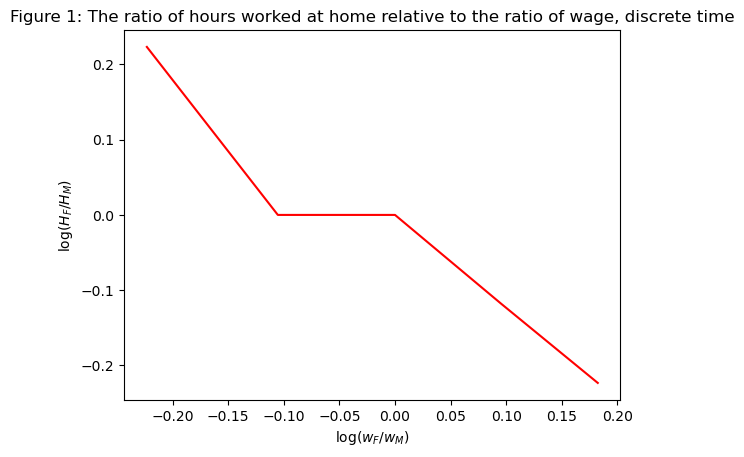

In [64]:
# (a) Initializing alpha and sigma
model.par.alpha = 0.5
model.par.sigma = 1


# (b) Creating empty lists
ratio_h = []
ratio_w = []


# (c) creating a loop over every wage of females 
for wF in [0.8, 0.9, 1, 1.1, 1.2]:

        # (i) defining parameteres in the model
        model.par.wF = wF
        
        # (ii) defining the discrete method
        results = model.solve_discrete()

        # (iii) defining the log ratio of hours worked at home
        ratio_h.append(np.log(results.HF / results.HM))

        # (iv) defining the log ratio of wage
        ratio_w.append(np.log(wF/model.par.wM))


# (d) plotting the figure
plt.plot(ratio_w, ratio_h, color='red')
plt.xlabel('log($w_F$/$w_M$)', fontsize=10)
plt.ylabel('log($H_F$/$H_M$)', fontsize=10)
plt.title('Figure 1: The ratio of hours worked at home relative to the ratio of wage, discrete time')
plt.show()


The figure illustrates that when the wage of females increases (relative to the male's), female's work at home relative to men decreases, because the alternative costs of women working at home increases. Explained intuitively, when female's salery increases, females work more at their paid jobs, which forces men to work more in the home.

# Question 3

Opposite of question 1-2, time is measured contaniously.

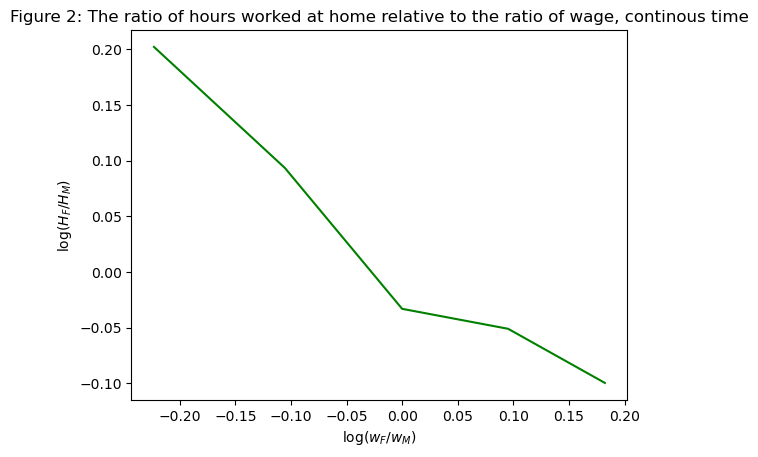

In [65]:
# (a) Creating empty lists
ratio_h_cont = []
ratio_w_cont = []


# (b) creating a loop over the wage of females
for wF in [0.8, 0.9, 1, 1.1, 1.2]:
    
        # (i) defining parameteres in the model
        model.par.wF = wF
        
        # (ii) defining the contiuous method
        opt = model.solve()

        # (iii) defining the log ratio of hours worked at home
        ratio_h_cont.append(np.log(opt.HF/opt.HM))

        # (iv) defining the log ratio of wage
        ratio_w_cont.append(np.log(wF/model.par.wM))


plt.plot(ratio_w_cont, ratio_h_cont, color='green')
plt.xlabel('log($w_F$/$w_M$)', fontsize=10)
plt.ylabel('log($H_F$/$H_M$)', fontsize=10)
plt.title('Figure 2: The ratio of hours worked at home relative to the ratio of wage, continous time')
plt.show()

Figure 2 illustrates the same relationship between the ratio og work and ratio of home labour as figure 1. However, since the figure is based on continous time, the graph is more smooth. Notice my initial guess $[4, 4.2, 5, 5.2]$ is not the optimal guess since the graph is not completely smooth. 

As in figure 1, $\alpha$ is set to $0.5$, which indicates the productivity of the genders are equal.
Furtermore, $\sigma$ is 1, which allows the genders to switch without any effects.
Based on the values of $\sigma$ and $\alpha$, it is reasonable for the males and females to adapt their hours of home labour when the wage of the female changes.

# Question 4

Based on the article Specialization, Comparative Advantage, and the Sexual Division of Labour (Siminski and Yetsenga, 2022), I run the regression: $log(H_F/H_M))=\beta_0 + beta_1 * log (w_F/w_H)$. In the following, I will illustrate how my model fitt with data when choosing $\alpha$ and $\sigma$ such that $(\beta_0-\hat\beta_0)^2$ and $(\beta_1-\hat\beta_1)^2$ are minimized

optimal alpha = 0.5007
optimal sigma = 0.5221


Text(0, 0.5, 'log($H_F$/$H_M$)')

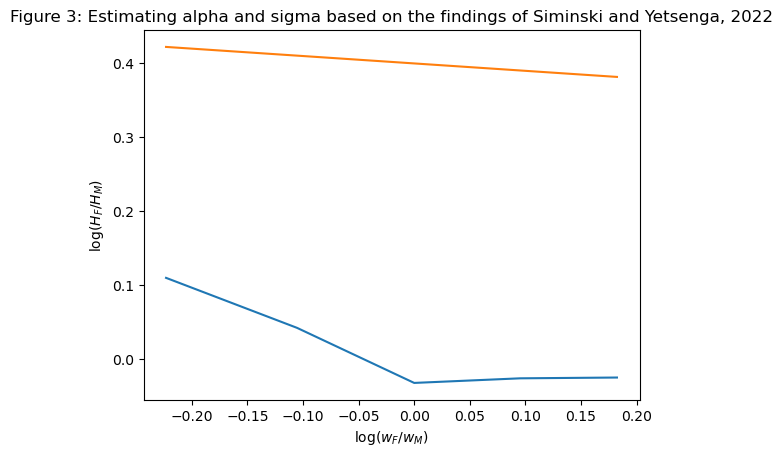

In [71]:
# (a) Finding the optimal values for alpha and sigma
model.estimate()


# (b) defining the ratio of hours worked with home labour
ratio_h = np.log(model.sol.HF_vec / model.sol.HM_vec)


# (c) creating and adjusting the figure
figure3 = plt.figure()
ax = figure3.add_subplot(1, 1, 1)
ax.plot(np.log(model.par.wF_vec),ratio_h)
ax.plot(np.log(model.par.wF_vec), model.par.beta_0_target + model.par.beta_1_target * np.log(model.par.wF_vec))
ax.set_title('Figure 3: Estimating alpha and sigma based on the findings of Siminski and Yetsenga, 2022')
ax.set_xlabel('log($w_F$/$w_M$)')
ax.set_ylabel('log($H_F$/$H_M$)')

The figure indicates that the estimations of $\alpha=0,50$ and $\sigma=0,52$ is not close to the findings of Siminski and Yetsenga, 2022. Therefore, the illustration contains a major gap between the two graphs. 
